<a href="https://colab.research.google.com/github/MendesEric/TransferLearningKeras/blob/main/CIFAR10EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras as k
from keras import datasets
from keras.datasets import cifar10
from keras import applications
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from keras.layers import Dense, LSTM, \
    Flatten, TimeDistributed, Conv2D, Dropout, BatchNormalization
from keras import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.efficientnet import preprocess_input

In [ ]:
opt = tf.keras.optimizers.Adam()

In [ ]:
#importando o dataset direto do keras
(x_train, y_train), (x_test, y_test) = k.datasets.cifar10.load_data()
#one hot encoding para as 10 classes do cifar10 e pré processamento necessário para MobileNet
def processa(x1,x2,y1,y2):
  x1 = tf.keras.applications.efficientnet.preprocess_input(x1)
  x2 = tf.keras.applications.efficientnet.preprocess_input(x2)
  y1 = to_categorical(y1,10)
  y2 = to_categorical(y2,10)
  return x1,x2,y1,y2

x_train, x_test, y_train, y_test = processa(x_train, x_test, y_train, y_test)

In [ ]:
#Como a efficientnet foi treinada com tamanho diferente de imagens (224x224), é necessário realizar um "upscale".
inputs = k.Input(shape=(32, 32, 3))
upscale = k.layers.Lambda(lambda x: tf.image.resize_with_pad(x,
                                                    160,
                                                    160,
                                                    method=tf.image.ResizeMethod.BILINEAR))(inputs)

In [ ]:
upscale

<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'lambda_4')>

In [ ]:
efficientnet = EfficientNetB0 (
               include_top=False,
               weights="imagenet",
               input_tensor=upscale,
               input_shape=(160,160,3),
               pooling=max,
               classifier_activation="softmax"    
)

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
out = efficientnet.output
out = Flatten()(out)
out = BatchNormalization()(out)
out = Dense(256, activation='relu')(out)
out = Dropout(0.3)(out)
out = BatchNormalization()(out)
out = Dense(128, activation='relu')(out)
out = Dropout(0.3)(out)
out = BatchNormalization()(out)
out = Dense(64, activation='relu')(out)
out = Dropout(0.3)(out)
out = Dense(10, activation='softmax')(out)

In [ ]:
model = k.models.Model(inputs = inputs, outputs = out)
model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 523s 326ms/step - loss: 0.6763 - accuracy: 0.7954 - val_loss: 0.3795 - val_accuracy: 0.8762
Epoch 2/10
1563/1563 [==============================] - 507s 325ms/step - loss: 0.4327 - accuracy: 0.8707 - val_loss: 0.2828 - val_accuracy: 0.9085
Epoch 3/10
1563/1563 [==============================] - 508s 325ms/step - loss: 0.3651 - accuracy: 0.8922 - val_loss: 0.3188 - val_accuracy: 0.9021
Epoch 4/10
1563/1563 [==============================] - 508s 325ms/step - loss: 0.3146 - accuracy: 0.9065 - val_loss: 0.4013 - val_accuracy: 0.8784
Epoch 5/10
1563/1563 [==============================] - 528s 338ms/step - loss: 0.2747 - accuracy: 0.9185 - val_loss: 0.3266 - val_accuracy: 0.8980
Epoch 6/10
1563/1563 [==============================] - 510s 326ms/step - loss: 0.2403 - accuracy: 0.9281 - val_loss: 0.2941 - val_accuracy: 0.9115
Epoch 7/10
1563/1563 [==============================] - 507s 325ms/step - loss: 0.2198 - accuracy: 0.9357 - val_

In [ ]:
import matplotlib.pyplot as plt


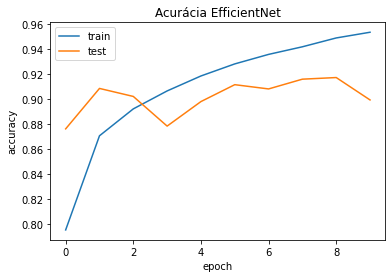

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia EfficientNet')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

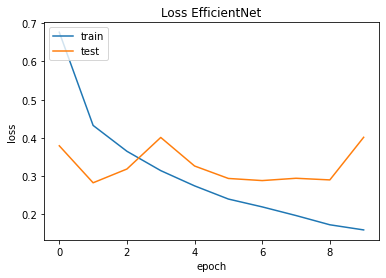

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss EfficientNet')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()